In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('/GlobalLandTemperaturesByCountry.csv')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [6]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [8]:
df_country = df['Country'].unique()
len(df_country)

243

In [10]:
df_germany = df.drop('AverageTemperatureUncertainty',axis = 1)

df_germany.head(10)

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland
5,1744-04-01,1.530,Åland
6,1744-05-01,6.702,Åland
7,1744-06-01,11.609,Åland
8,1744-07-01,15.342,Åland
9,1744-08-01,NaN,Åland


In [14]:
df_germany = df_germany[df_germany.Country == "Germany"]
df_germany.tail(10)

,dt,AverageTemperature,Country
204669,12/1/2012,1.216,Germany
204670,1/1/2013,-0.067,Germany
204671,2/1/2013,-0.731,Germany
204672,3/1/2013,0.394,Germany
204673,4/1/2013,8.213,Germany
204674,5/1/2013,12.151,Germany
204675,6/1/2013,15.927,Germany
204676,7/1/2013,19.762,Germany
204677,8/1/2013,18.233,Germany
204678,9/1/2013,NaN,Germany


In [16]:
df_germany.drop('Country',axis=1,inplace=True)


KeyError: ignored

In [17]:
df_germany.head(10)

,dt,AverageTemperature
201440,1743-11-01,5.468
201441,1743-12-01,NaN
201442,1744-01-01,NaN
201443,1744-02-01,NaN
201444,1744-03-01,NaN
201445,1744-04-01,8.438
201446,1744-05-01,11.498
201447,1744-06-01,14.262
201448,1744-07-01,16.293
201449,1744-08-01,NaN


In [0]:
df_germany.index = pd.to_datetime(df_germany.dt)


In [0]:
df_germany.drop('dt',axis = 1, inplace = True)

In [20]:
df_germany.head()

,AverageTemperature
dt,
1743-11-01,5.468
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN


In [21]:
# Identify the Missing Values
df_germany.isnull().sum()

AverageTemperature    73
dtype: int64

In [0]:
# Missing Value Treatment
df_germany.AverageTemperature.fillna(method='pad', inplace=True)


In [23]:
df_germany.describe()

,AverageTemperature
count,3239.000000
mean,8.130286
std,6.845181
min,-9.298000
25%,2.247000
50%,7.854000
75%,14.574500
max,22.343000


In [0]:
df_germany['Ticks'] = range(0,len(df_germany.index.values))

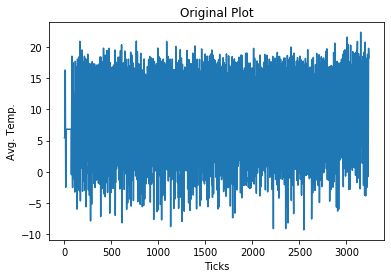

In [26]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'AverageTemperature', data = df_germany);

In [0]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


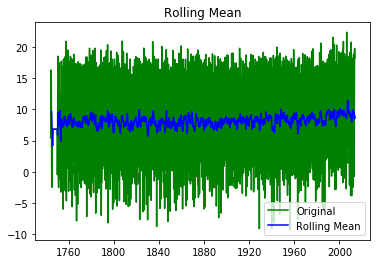

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-8.240588419122279, 5.731456555543559e-13, 28, 3210, {'1%': -3.4323887965708293, '5%': -2.8624408170993605, '10%': -2.5672495249463805}, 13205.36188361996)
df_output: 
 Test Statistic                -8.240588e+00
p-value                        5.731457e-13
#Lags Used                     2.800000e+01
Number of Observations Used    3.210000e+03
dtype: float64
Test Statistic                -8.240588e+00
p-value                        5.731457e-13
#Lags Used                     2.800000e+01
Number of Observations Used    3.210000e+03
Critical Value (1%)           -3.432389e+00
Critical Value (5%)           -2.862441e+00
Critical Value (10%)          -2.567250e+00
dtype: float64


In [45]:
stationarity_check(df_germany.AverageTemperature)


In [0]:
df_germany['Roll_Mean'] = df_germany['AverageTemperature'].rolling(12).mean()


In [49]:
df_germany.head(10)

,AverageTemperature,Ticks,Roll_Mean
dt,,,
1743-11-01,5.468,0,NaN
1743-12-01,5.468,1,NaN
1744-01-01,5.468,2,NaN
1744-02-01,5.468,3,NaN
1744-03-01,5.468,4,NaN
1744-04-01,8.438,5,NaN
1744-05-01,11.498,6,NaN
1744-06-01,14.262,7,NaN
1744-07-01,16.293,8,NaN


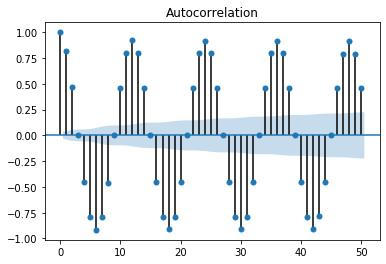

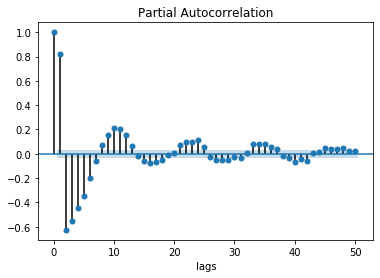

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(df_germany.AverageTemperature, lags=50)
plot_pacf(df_germany.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

In [0]:
from statsmodels.tsa.arima_model import ARMA


In [55]:
import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df_germany.AverageTemperature,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 0) - AIC:21655.607778713234
ARMA(0, 1) - AIC:19006.894979230376


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 3) - AIC:16996.107880979092
ARMA(1, 0) - AIC:18013.755629799576


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 1) - AIC:17315.737973565545


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 2) - AIC:18959.47715428877


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 3) - AIC:17584.395259993267


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 0) - AIC:16407.473598425044


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 2) - AIC:13514.740831511835


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 3) - AIC:13339.755790330943
ARMA(3, 0) - AIC:15230.418988365016


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 2) - AIC:13303.909570072803


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARMA(3, 3) - AIC:13288.270927647776


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: Hessia

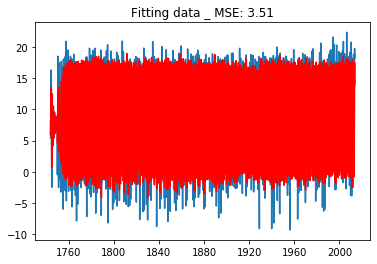

In [56]:

model = ARMA(df_germany.AverageTemperature, order=(3,3))  
results_MA = model.fit()  
plt.plot(df_germany.AverageTemperature)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_germany.AverageTemperature)**2).mean()))
plt.show()

In [0]:
predictions = results_MA.predict('01/01/1970', '12/01/2023')


In [69]:
predictions

2003-01-01    -0.827133
2003-02-01     0.367729
2003-03-01     2.848495
2003-04-01     8.471236
2003-05-01    12.734303
                ...    
2023-08-01    16.916018
2023-09-01    13.627806
2023-10-01     8.867475
2023-11-01     3.910471
2023-12-01     0.084936
Freq: MS, Length: 252, dtype: float64